In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sn


## Load Dataset

In [2]:
X = pd.read_csv("./Dataset/data.csv")
y = pd.read_csv("./Dataset/labels.csv")

In [3]:
print(X.shape)
print(y.shape)
X = X.iloc[:, 1:]
y = y.iloc[:, 1:]
print(y.head())

(801, 20532)
(801, 2)
  Class
0  PRAD
1  LUAD
2  PRAD
3  PRAD
4  BRCA


In [136]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)


## over sampling

In [137]:
from imblearn.over_sampling import SMOTE
over_sample = SMOTE()

X, y = over_sample.fit_resample(X, y)
print(X.shape)
print(y.shape)
print(X.nunique())
print(y.nunique())
print(y.value_counts())

(1500, 20531)
(1500,)
gene_0         128
gene_1        1468
gene_2        1492
gene_3        1499
gene_4        1498
              ... 
gene_20526    1499
gene_20527    1500
gene_20528    1499
gene_20529    1499
gene_20530     253
Length: 20531, dtype: int64


AttributeError: 'numpy.ndarray' object has no attribute 'nunique'

### Analyzing dataset after oversampling to find out whether there is any sample with all zero features or not. And then plot it

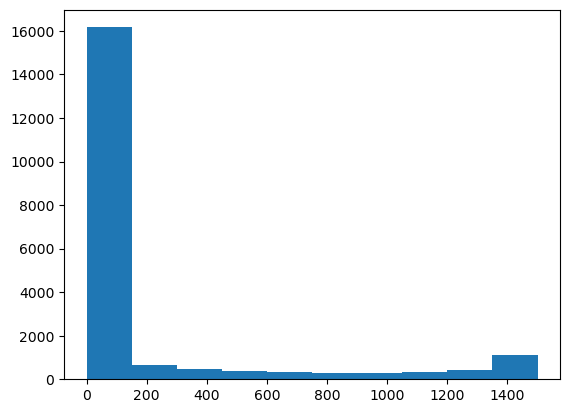

In [138]:
plt.hist(X.isin([0, 0.0]).sum())
plt.show()

## Normalization and getting out from NA features

In [98]:
# Removing any NA samples.
X_1 = X.dropna()
print(X_1.shape)
X_2_for_plot = X_1.dropna()
print(X_2_for_plot.shape)
X2_for_plot = X_2_for_plot.drop(columns=X_2_for_plot.columns[(X_2_for_plot == 0.0).sum()>500])
print(X2_for_plot.shape)

# normalizing data
from sklearn.preprocessing import MinMaxScaler
minmax_norm = MinMaxScaler()
X_train_norm = minmax_norm.fit_transform(X_1)


(1500, 20531)
(1500, 20531)
(1500, 17444)


### Feature selection
The output of chi-score is a tupe of 2 seperate arrays. Its output is the most relevant features regarding to labels.

In [139]:
from sklearn.feature_selection import chi2, mutual_info_classif

# chi_score = chi2(X_1, y)
# info_gain = mutual_info_classif(X_1, y)
chi_score = chi2(X_1, y)
info_gain = mutual_info_classif(X_1, y)


In [140]:
p_values = pd.Series(chi_score[1],index = X_2_for_plot.columns)
p_values.sort_values(ascending = False , inplace = True)
p_values_IG = pd.Series(info_gain, index = X_2_for_plot.columns)
p_values_IG.sort_values(ascending = False, inplace= True)

<AxesSubplot:>

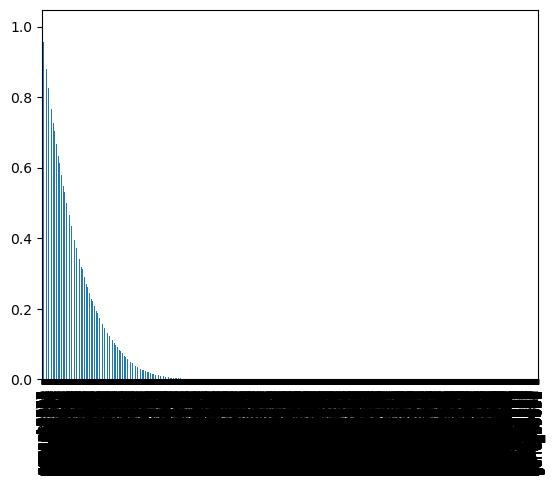

In [141]:
p_values.plot.bar()

<AxesSubplot:>

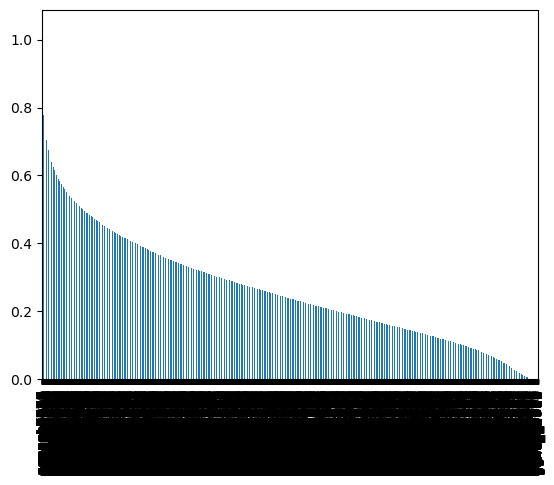

In [142]:
p_values_IG.plot.bar()

#### select the best features , default 500 compared to 20532 features

In [157]:
from sklearn.feature_selection import SelectKBest
from mrmr import mrmr_classif

chi2_selector = SelectKBest(chi2, k=50)
X_chi_K_best = chi2_selector.fit_transform(X_train_norm, y)

IG_selector = SelectKBest(mutual_info_classif, k=50)
X_IG_K_best = IG_selector.fit_transform(X_train_norm, y=y)

# mrmr_K_best = mrmr_classif(X_train_norm, y, K=100)

print(X_chi_K_best)
print(X_IG_K_best)
# print(mrmr_K_best)


[[0.05449182 0.         0.04200754 ... 0.4637352  0.         0.07222589]
 [0.         0.15216606 0.         ... 0.         0.         0.        ]
 [0.15495099 0.         0.         ... 0.86971928 0.         0.        ]
 ...
 [0.         0.03386835 0.         ... 0.56060654 0.         0.        ]
 [0.18616025 0.         0.         ... 0.85500299 0.         0.        ]
 [0.02633793 0.         0.         ... 0.89757606 0.         0.04034613]]
[[0.34025664 0.05561836 0.22258548 ... 0.75203608 0.11092581 0.        ]
 [0.34644394 0.13766989 0.28812022 ... 0.23190781 0.02245772 0.05624801]
 [0.03789654 0.12280483 0.35133176 ... 0.43750434 0.         0.13737933]
 ...
 [0.18004313 0.09810861 0.27202583 ... 0.70114948 0.         0.        ]
 [0.05605161 0.08324987 0.28701827 ... 0.75348605 0.         0.        ]
 [0.07662291 0.02688242 0.3533014  ... 0.75612212 0.         0.05290224]]


In [158]:
print(X_IG_K_best.shape)
print(X_chi_K_best.shape)

(1500, 50)
(1500, 50)


## Spliting dataset into train and test

In [159]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier

X_train_chi, X_test_chi, y_train_chi, y_test_chi = train_test_split(X_chi_K_best, y, test_size=0.2, random_state=42)
X_train_IG, X_test_IG, y_train_IG, y_test_IG = train_test_split(X_IG_K_best, y, test_size=0.2, random_state=47)



# Calling Clustering methods


In [ ]:
from Clustering_Methods import Clustering_Methods

clustering = Clustering_Methods("dataset1", "a", n_clusters=5 )

models = clustering.adding_methods()
print("Clustering Models:", models)

clustering.training_models(Models=models,
                           x_train=X_train_chi,
                           x_test=X_test_chi,
                           y_train=y_train_chi,
                           y_test=y_test_chi,
                           dataset_name="ATCG_Chi_squared")

clustering.training_models(Models=models,
                           x_train=X_train_IG,
                           x_test=X_test_IG,
                           y_train=y_train_IG,
                           y_test=y_test_IG,
                           dataset_name="ATCG_IG_squared")

In [160]:
from sklearn.cluster import SpectralClustering

model = SpectralClustering()

model.fit(X_train_chi, y_train_chi)

SpectralClustering()

In [161]:
from sklearn.metrics import accuracy_score, confusion_matrix
y_pred_chi = model.fit_predict(X_test_chi)

accuracy = accuracy_score(y_test_chi, y_pred=y_pred_chi)
print("accuracy of chi-squared = ", accuracy)

# confusion_matrix(y_test_chi, y_pred_chi)
# print(y_encode.shape)
print(y_test_chi.shape)
print(y_pred_chi.shape)


accuracy of chi-squared =  0.19333333333333333
(300,)
(300,)
